In [1]:
import cvxpy as cp
import numpy as np
import osbdo as ob
import random
np.random.seed(0)
random.seed(0)

# Create parameters

In [2]:
params = ob.mcf_params(num_vertices=100, num_edges=1000, M=10)

# Distributed solution with limited memory $m$

In [3]:
agents = ob.mcf_agents(params)
g = ob.mcf_coupling(agents, params)
prob = ob.Problem(agents = agents, g = g)

In [4]:
max_iter = 30
memory = [2, 10, 20, max_iter]
memory_bounds = {}
for m in memory:
    print(f"memory = {m}")
    prob.solve(rel_gap = 10**(-10), abs_gap = 10**(-10), max_iter=max_iter, memory=m, minorant_update='drop_constr', print_freq=10)
    memory_bounds[m] = {'uk':prob.upper_bnd, 'lk':prob.lower_bnd}

memory = 2
k=0, rel_gap=2158.3099681034682, L=-20000.0, U=-9.262218160168125, L0=-20000.0
k=10, rel_gap=0.22149096110009683, L=-91.80988329352067, U=-75.16214709508372, L0=-123.3275197959408


/Users/fangzhaozhang/miniconda3/envs/hw4/lib/python3.8/site-packages/cvxpy/problems/problem.py:1385: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


k=20, rel_gap=0.09771877808108283, L=-91.80988329352067, U=-83.63697982284052, L0=-113.0870255647891
memory = 10
k=0, rel_gap=2158.3099681034682, L=-20000.0, U=-9.262218160168125, L0=-20000.0
k=10, rel_gap=0.08652408519894711, L=-89.33797474705875, U=-82.22364875666847, L0=-89.33797474705875
k=20, rel_gap=0.025111607143560505, L=-88.8665312102865, U=-86.6896156389353, L0=-88.8665312102865
memory = 20
k=0, rel_gap=2158.3099681034682, L=-20000.0, U=-9.262218160168125, L0=-20000.0
k=10, rel_gap=0.08652408519894711, L=-89.33797474705875, U=-82.22364875666847, L0=-89.33797474705875
k=20, rel_gap=0.010126763027208026, L=-88.11112139023108, U=-87.22778626929399, L0=-88.11112139023108
memory = 30
k=0, rel_gap=2158.3099681034682, L=-20000.0, U=-9.262218160168125, L0=-20000.0
k=10, rel_gap=0.08652408519894711, L=-89.33797474705875, U=-82.22364875666847, L0=-89.33797474705875
k=20, rel_gap=0.010126763027208026, L=-88.11112139023108, U=-87.22778626929399, L0=-88.11112139023108


# Centralized solution

In [5]:
h_cvx = ob.cvx_multi_commodity_flow(params=params)[2]

# Plot

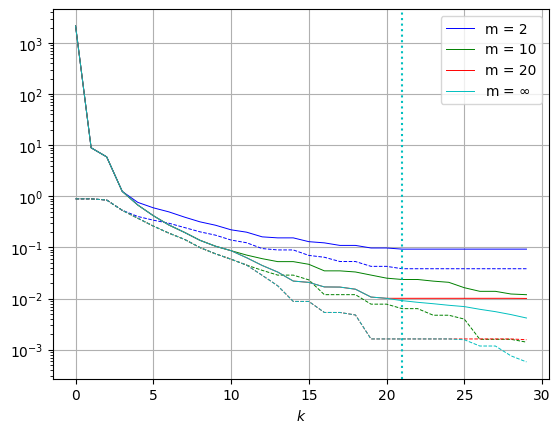

In [6]:
ob.plot_finite_memory(memory_bounds=memory_bounds, memory=memory, h_true=h_cvx)